In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from sklearn.metrics import mean_squared_error

## Experiment 1 - Low Pass Gaussian Filter

In [7]:
def gaussian_filter_td(k = 11, sigma = 1):
    x, y = np.meshgrid(np.arange(-(k//2),k//2+1),np.arange(-(k//2),k//2+1))
    G_xy = np.exp(-(x**2+y**2)/(2*sigma**2))
    G_xy /= np.sum(G_xy)
    return G_xy

def do_gaussian_smoothing(image, k=11, sigma=1):
    G_xy = gaussian_filter_td(k, sigma)
    for i in range(image.shape[2]):
        smoothed_channel = convolve2d(image[:,:,i], G_xy, mode='same', boundary='symm')
        if i == 0:
            smoothed_image = np.zeros_like(image)
        smoothed_image[:,:,i] = smoothed_channel
    return smoothed_image

Image 1: Best sigma = 0.1, MSE(before smoothing) = 24.76818084716797, MSE = 24.76818084716797


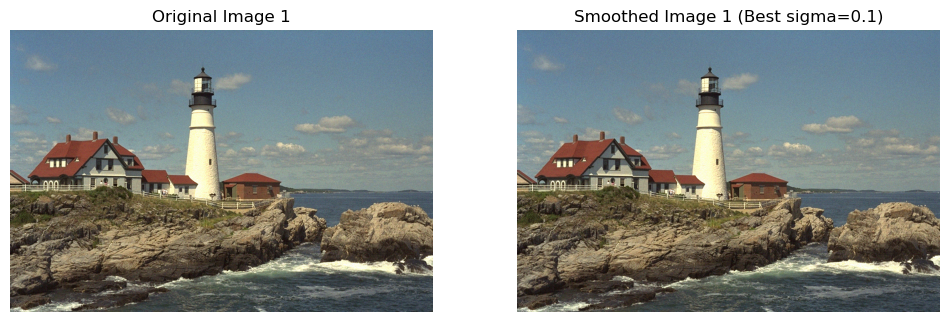

Image 2: Best sigma = 0.1, MSE(before smoothing) = 79.69731140136719, MSE = 79.69731140136719


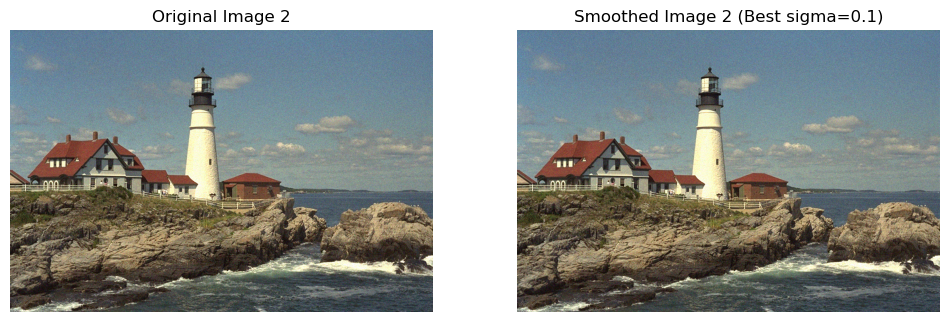

Image 3: Best sigma = 1, MSE(before smoothing) = 919.0718409220377, MSE = 185.0431603325738


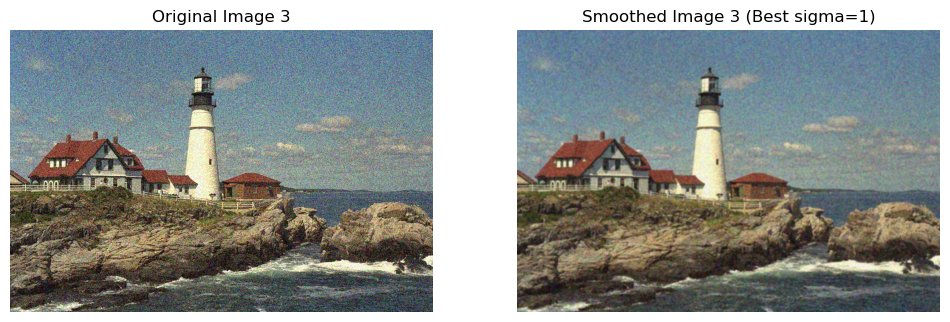

Image 4: Best sigma = 1, MSE(before smoothing) = 1638.5141228569878, MSE = 248.2416034274631


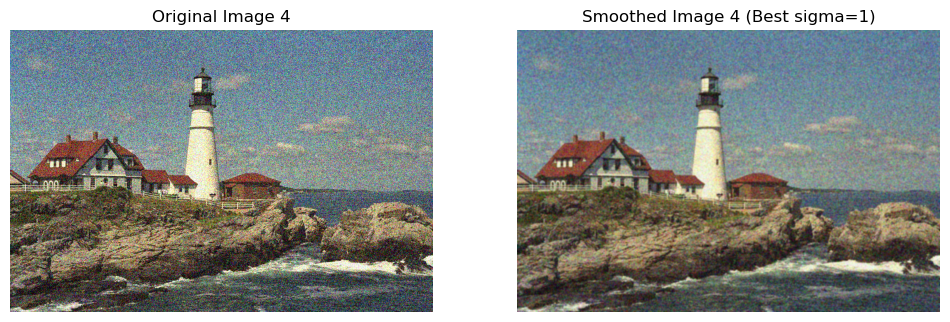

Image 5: Best sigma = 8, MSE(before smoothing) = 15423.493832058377, MSE = 1651.684088812934


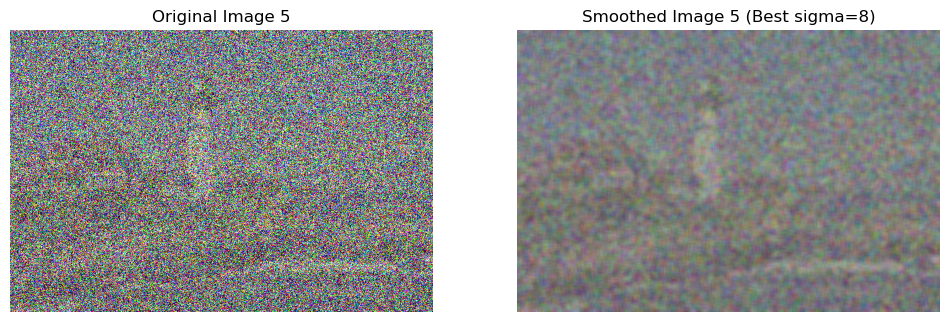

In [33]:
image_ref = plt.imread('imagesforlab1/img167.bmp')
image6 = plt.imread('imagesforlab1/img6.bmp')
image32 = plt.imread('imagesforlab1/img32.bmp')
image108 = plt.imread('imagesforlab1/img108.bmp')
image125 = plt.imread('imagesforlab1/img125.bmp')
image137 = plt.imread('imagesforlab1/img137.bmp')


image_list = [image125, image6, image108, image32, image137]
best_sigma_list = []

for i, img in enumerate(image_list):
    mse = []
    for sigma in [0.1,1,2,4,8]:
        smoothed_image = do_gaussian_smoothing(img, k=11, sigma=sigma)
        error = mean_squared_error(image_ref.flatten(), smoothed_image.flatten())
        mse.append(error)

    best_sigma = [0.1,1,2,4,8][np.argmin(mse)]
    best_sigma_list.append(best_sigma)
    print(f"Image {i+1}: Best sigma = {best_sigma}, MSE(before smoothing) = {mean_squared_error(image_ref.flatten(), img.flatten())}, MSE = {min(mse)}") 
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original Image {i+1}")
    plt.axis('off') 
    plt.subplot(1, 2, 2)
    plt.imshow(do_gaussian_smoothing(img, k=11, sigma=best_sigma))
    plt.title(f"Smoothed Image {i+1} (Best sigma={best_sigma})")
    plt.axis('off')
    plt.show() 


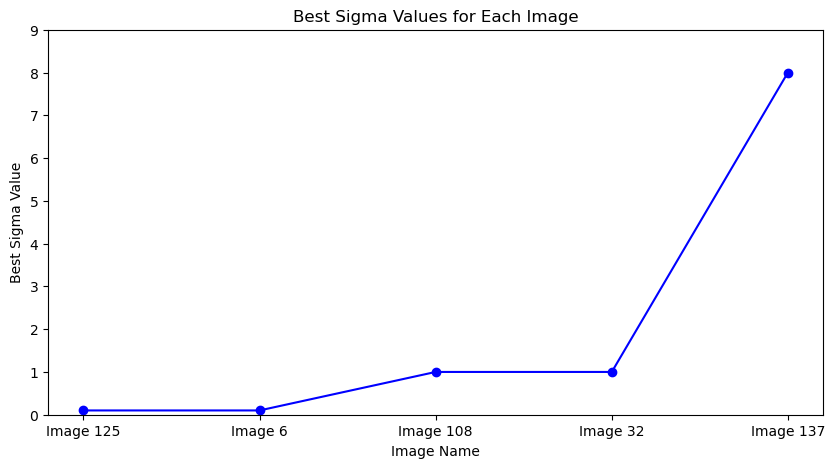

In [15]:
#Plot the best sigma values for each image
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), best_sigma_list, color='blue', marker='o')
plt.xlabel('Image Name')
plt.ylabel('Best Sigma Value')
plt.title('Best Sigma Values for Each Image')
plt.xticks(range(1, 6), ['Image 125', 'Image 6', 'Image 108', 'Image 32', 'Image 137'])
plt.ylim(0, max(best_sigma_list) + 1)
plt.show()  

## Experiment 2 - Bilateral Filter

In [21]:
def bilateral_filter_td(image, k=11, sigma_s=1, sigma_r=0.1):
    x, y = np.meshgrid(np.arange(-(k//2),k//2+1),np.arange(-(k//2),k//2+1))
    G_s = np.exp(-(x**2+y**2)/(2*sigma_s**2))
    G_s /= np.sum(G_s)
    
    padded_image = np.pad(image, ((k//2, k//2), (k//2, k//2)), mode='constant')
    filtered_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+k, j:j+k]
            intensity_diff = region - image[i, j]
            G_r = np.exp(-(intensity_diff**2) / (2*sigma_r**2))
            weights = G_s * G_r
            weights /= np.sum(weights)
            filtered_pixel = np.sum(region * weights)
            filtered_image[i, j] = filtered_pixel
            
    return filtered_image

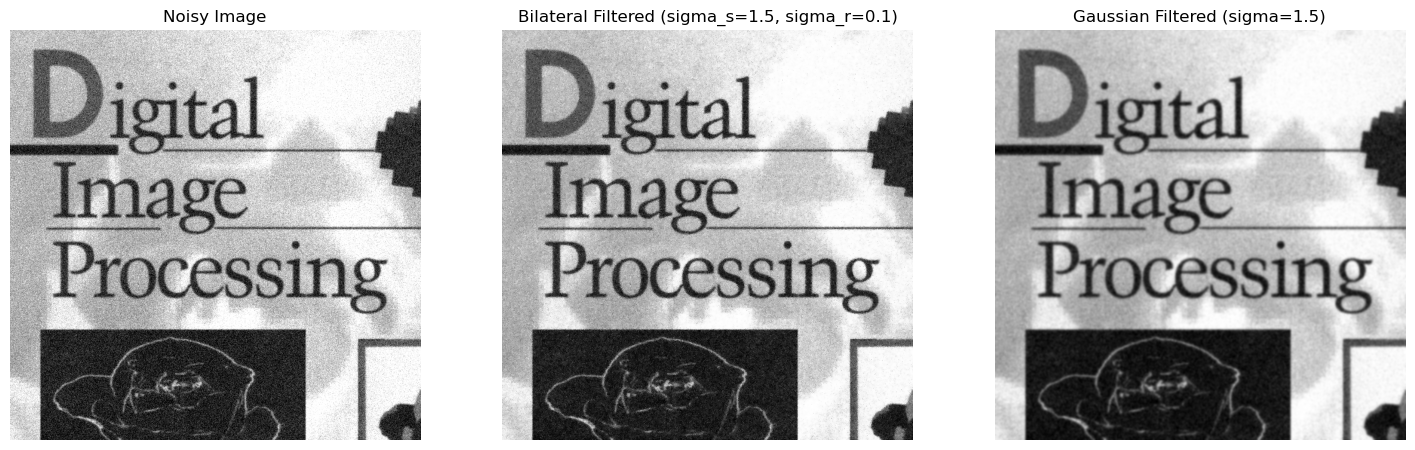

In [32]:
noisybook = plt.imread('imagesforlab1/noisybook.png')

sigma_s = 1.5
sigma_r = 0.1
filtered_image_bl = bilateral_filter_td(noisybook, k=11, sigma_s=sigma_s, sigma_r=sigma_r)
filtered_image_gaussian = convolve2d(noisybook, gaussian_filter_td(k=11, sigma=sigma_s), mode='same', boundary='symm')

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(noisybook, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')     
plt.subplot(1, 3, 2)
plt.imshow(filtered_image_bl, cmap='gray')
plt.title(f"Bilateral Filtered (sigma_s={sigma_s}, sigma_r={sigma_r})")
plt.axis('off') 
plt.subplot(1, 3, 3)
plt.imshow(filtered_image_gaussian, cmap='gray')
plt.title(f"Gaussian Filtered (sigma={sigma_s})")
plt.axis('off')
plt.show()